In [1]:
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import graphviz 

# Algoritmo Random Forest
def randomForest():
  print("inicia Random Forest")
  rfc_object = rfc(n_estimators=200, random_state=0)
  rfc_object.fit(train_features, train_labels)
  predicted_labels = rfc_object.predict(test_features)
  # se verifican resultados
  print(classification_report(test_labels, predicted_labels))
  print(confusion_matrix(test_labels, predicted_labels))
  print(accuracy_score(test_labels, predicted_labels))

  # Regresión lineal
def regresionLineal():
  print("inicia Regresión lineal")
  # Algoritmo
  lr_object = LogisticRegression()
  lr_object.fit(train_features, train_labels)
  predicted_labels = lr_object.predict(test_features)
  # se verifican resultados
  print(classification_report(test_labels, predicted_labels))
  print(confusion_matrix(test_labels, predicted_labels))
  print(accuracy_score(test_labels, predicted_labels))
  
  
# arbol de decision
def arbolDecision():
  print("inicia Arboles de decisión")
  # Create each decision tree (pruned and unpruned)
  decisionTree_unpruned = tree.DecisionTreeClassifier()
  decisionTree = tree.DecisionTreeClassifier(max_depth = 4)
  # Fit each tree to our training data
  decisionTree_unpruned = decisionTree_unpruned.fit(X=train_features, y=train_labels)
  decisionTree = decisionTree.fit(X=train_features, y=train_labels)
  # Generate PDF visual of decision tree
  churnTree = tree.export_graphviz(decisionTree, out_file=None, 
                           feature_names = list(train_features.columns.values),  
                           class_names = ['No churn', 'Churn'],
                           filled=True, rounded=True,  
                           special_characters=True)  
  graph = graphviz.Source(churnTree)
  graph.render('decision_tree.gv', view=True)
  predicted_labels = decisionTree.predict(test_features)
  # se verifican resultados
  print(classification_report(test_labels, predicted_labels))
  print(confusion_matrix(test_labels, predicted_labels))
  print(accuracy_score(test_labels, predicted_labels))
  

#GradientBoostingClassifier
def gradientBoost():
  print("inicia Gradient Boosting Classifier")
  #Create Gradient Boosting Classifier
  gb = GradientBoostingClassifier()
  #Train the model using the training sets
  gb.fit(train_features, train_labels)
  #Predict the response for test dataset
  predicted_labels = gb.predict(test_features)
  print(classification_report(test_labels, predicted_labels))
  print(confusion_matrix(test_labels, predicted_labels))
  print(accuracy_score(test_labels, predicted_labels))
  
    # SVM  
def SVM():
  # Algoritmo
  print("inicia Support Vector Machine")
  svc_object = svc(kernel='rbf', degree=8)
  svc_object.fit(train_features, train_labels)
  predicted_labels = svc_object.predict(test_features) 
  # se verifican resultados
  print(classification_report(test_labels, predicted_labels))
  print(confusion_matrix(test_labels, predicted_labels))
  print(accuracy_score(test_labels, predicted_labels))

# Deep Learning
def redesNeuronales():
  print("Inicia Deep Learning")
  # Se genera el modelo 
  modelo = Sequential()
  #Se define un monitor de parada temprana para que el modelo deje de entrenar cuando ya no mejore
  early_stopping_monitor = EarlyStopping(patience=3)
  #Se obtienen las columnas de entrenamiento
  scale = StandardScaler()
  X_dataset = scale.fit_transform(features)
  Y_dataset =labels.values 
  n_cols = X_dataset.shape[1]
  #Se agregan las capas, aumentar el número de nodos en cada capa aumenta la capacidad del modelo pero por Collab lo dejare en esa cantidad
  # La función de activación que utilizaremos es ReLU o activación lineal rectificada. 
  # Aunque se trata de dos piezas lineales, se ha demostrado que funciona bien en redes neuronales.
  modelo.add (Dense (128, activation = 'relu', input_shape = (n_cols,))) 
  modelo.add( Dropout(0.3))
  modelo.add (Dense (64, activation = 'relu')) 
  modelo.add( Dropout(0.25))
  modelo.add (Dense (64, activation = 'sigmoid')) 
  modelo.add( Dropout(0.4))
  modelo.add (Dense (64, activation = 'sigmoid')) 
  modelo.add( Dropout(0.25))
  modelo.add (Dense (1, activation = 'sigmoid')) 
  #Una función de activación permite a los modelos tener en cuenta las relaciones no lineales. 
  #Por ejemplo, si predice la diabetes en los pacientes, pasar de los 10 a los 11 años es diferente a los de los 60 a los 61 años.
  #La activación es 'softmax'. Softmax hace que la sum
    # compilar el modelo utilizando la precisión para medir el rendimiento del modelo 
  modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  resultado=modelo.fit(X_dataset, Y_dataset, batch_size=30, epochs=30, validation_split=0.4, callbacks=[early_stopping_monitor])

  predicted_labels = modelo.predict(test_features)
  print(classification_report(test_labels, predicted_labels.round()))
  print(confusion_matrix(test_labels, predicted_labels.round()))
  print(accuracy_score(test_labels, predicted_labels.round()))

Using TensorFlow backend.


In [2]:
!pip install turicreate
!pip install lifetimes
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time
import turicreate as tc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lifetimes.utils import *
from lifetimes import BetaGeoFitter,GammaGammaFitter
from lifetimes.plotting import plot_probability_alive_matrix, plot_frequency_recency_matrix, plot_period_transactions, plot_cumulative_transactions,plot_incremental_transactions
from lifetimes.generate_data import beta_geometric_nbd_model
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases, plot_period_transactions,plot_history_alive
import sys
sys.path.append("..")
## Algoritmos de ML
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.svm import SVC as svc 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import tree
import graphviz 
from sklearn import metrics

from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [3]:
url = 'https://github.com/masdatascience/TFM-AI/blob/master/transacciones.xlsx?raw=true'
datos_modelo_completo = pd.ExcelFile(url)
datos_facturacion = pd.read_excel(datos_modelo_completo, sheet_name='transacciones')
# Se elimian los datos nulos de las dimensiones importantes del analisis que son productos y clientes
#datos_facturacion = datos_facturacion.dropna(subset=['customer_id'])
#datos_facturacion = datos_facturacion.dropna(subset=['product_id'])
# Se elimina posibles chargeback que se presenten
url1 = 'https://github.com/masdatascience/TFM-AI/blob/master/data_model_completo.xlsx?raw=true'
datos_modelo_completo = pd.ExcelFile(url1)
#datos_facturacion = datos_facturacion.loc[datos_facturacion['total_value'] > 0]
datos_producto = pd.read_excel(datos_modelo_completo, sheet_name='product')
datos_clientes = pd.read_excel(datos_modelo_completo, sheet_name='customer')
print("datos productos: "+str(datos_producto.shape))
print("datos clientes: "+str(datos_clientes.shape))
print("datos facturación: "+str(datos_facturacion.shape))
# se visualiza el número de comrpas que tiene un cliente
datos_clientes.groupby('customer_id').size().value_counts()
datos_facturacion.groupby('customer_id').size().value_counts()
  

datos productos: (32951, 10)
datos clientes: (96352, 4)
datos facturación: (100010, 11)


1     91370
2      3643
3       327
4        55
5        14
6         6
7         3
16        1
10        1
dtype: int64

3.1 MARCAJE CHURN 


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.6/dist-packages/lifetimes/generate_data.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  next_purchase_in = random.exponential(scale=1.0 / l)


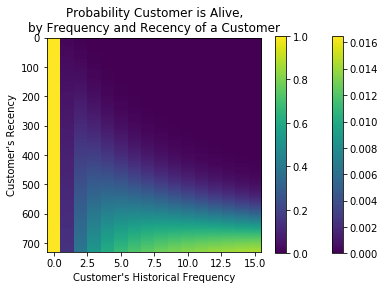

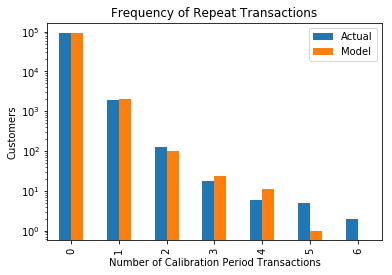

In [4]:
datos_facturacion['date'] = pd.to_datetime(datos_facturacion['order_purchase_timestamp']).dt.date
datos_facturacion = datos_facturacion.drop('order_purchase_timestamp',axis=1)
# se realiza un subconjunto de columnas con los cuales se analizará el comportamiento de compra
transaction_data = datos_facturacion[['customer_id','date','price']]
# se crea el modelo RFM
summary = summary_data_from_transaction_data(transaction_data,'customer_id','date',monetary_value_col='price',)
t=1
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
plot_frequency_recency_matrix(bgf);
plot_probability_alive_matrix(bgf)
plot_period_transactions(bgf).set_yscale('log');
summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'], summary['recency'], summary['T'])


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


1    95844
2      248
3        4
dtype: int64

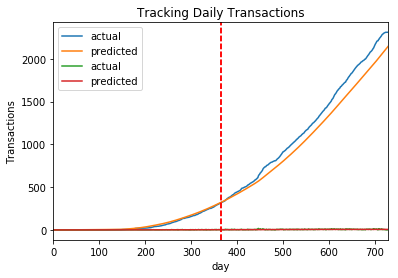

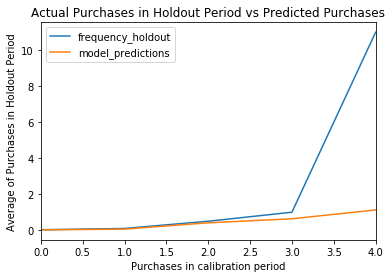

In [5]:
summary_cal_holdout = calibration_and_holdout_data(datos_facturacion, 'customer_id', 'date',calibration_period_end='2017-09-03', observation_period_end='2018-09-03' )
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_cumulative_transactions(bgf, datos_facturacion, 'date', 'customer_id', 730, 365);
plot_incremental_transactions(bgf, datos_facturacion, 'date', 'customer_id', 730, 365);
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout);
datos_clientes.groupby('customer_id').size().value_counts()



churned        1928
high risk        84
not churned      73
Name: churn, dtype: int64

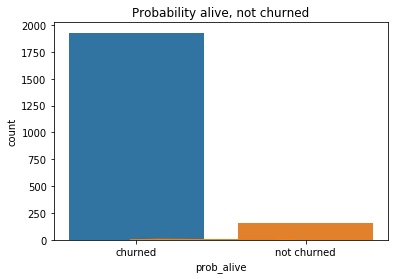

In [6]:
df = summary[summary['frequency']>0]
df['prob_alive'] = bgf.conditional_probability_alive(df['frequency'],df['recency'],df['T'])
sns.distplot(df['prob_alive']);
df['churn'] = ['churned' if p < .1 else 'not churned' for p in df['prob_alive']]
sns.countplot(df['churn']);
sns.distplot(df[df['churn']=='not churned']['prob_alive']).set_title('Probability alive, not churned');
df['churn'][(df['prob_alive']>=.1) & (df['prob_alive']<.2)] = "high risk"
df['churn'].value_counts()


3.2 Churn prediction


In [7]:
print(summary.median())
df['is_churn'] = np.where( (df['frequency']<1) & (df['T']>400) & (df['recency']<1) & (df['recency']<0.000044), 1, 0) 
summary['is_churn'] = np.where( (summary['frequency']<1) & (summary['T']>400) & (summary['recency']<1) & (summary['recency']<0.000044), 1, 0) 
prueba_clientes = pd.merge(datos_clientes,summary[['is_churn']],on='customer_id', how='left')
prueba_clientes = pd.merge(prueba_clientes,datos_facturacion[['customer_id','seller_id']].drop_duplicates(),on='customer_id', how='left')
prueba_clientes['is_churn'].fillna(0, inplace=True)
prueba_clientes['seller_id'].fillna(0, inplace=True)
print(prueba_clientes.count())
prueba_clientes.groupby('is_churn').count()
prueba_clientes['is_churn'].mean()

frequency                0.000000
recency                  0.000000
T                      227.000000
monetary_value           0.000000
predicted_purchases      0.000054
dtype: float64
customer_id                 100232
customer_state              100232
customer_city               100232
customer_zip_code_prefix    100232
is_churn                    100232
seller_id                   100232
dtype: int64


0.17545294915795354

In [0]:
def labelDatase(dataset):

  le = preprocessing.LabelEncoder()

  for column_name in dataset.columns:
        if dataset[column_name].dtype == object:
            dataset[column_name] = le.fit_transform(dataset[column_name])
        else:
            pass

  return dataset
  

In [9]:
print(summary.median())
df['is_churn'] = np.where( (df['frequency']<1) & (df['T']>400) & (df['recency']<1) & (df['recency']<0.000044), 1, 0) 
summary['is_churn'] = np.where( (summary['frequency']<1) & (summary['T']>400) & (summary['recency']<1) & (summary['recency']<0.000044), 1, 0) 

prueba_clientes = pd.merge(datos_clientes,summary[['is_churn']],on='customer_id', how='left')
prueba_clientes = pd.merge(prueba_clientes,datos_facturacion[['customer_id','seller_id']].drop_duplicates(),on='customer_id', how='left')
prueba_clientes['is_churn'].fillna(0, inplace=True)
prueba_clientes['seller_id'].fillna(0, inplace=True)
print(prueba_clientes.count())
prueba_clientes.groupby('is_churn').count()
prueba_clientes['is_churn'].mean()


frequency                0.000000
recency                  0.000000
T                      227.000000
monetary_value           0.000000
predicted_purchases      0.000054
is_churn                 0.000000
dtype: float64
customer_id                 100232
customer_state              100232
customer_city               100232
customer_zip_code_prefix    100232
is_churn                    100232
seller_id                   100232
dtype: int64


0.17545294915795354

In [36]:
enconder = LabelEncoder()


dataset =  prueba_clientes.drop(['customer_id','customer_city','seller_id'], axis=1)
ds_customer_city = pd.get_dummies(prueba_clientes.customer_city).iloc[:,1:]
#ds_seller_id = pd.get_dummies(prueba_clientes.seller_id.astype('category').cat.codes).iloc[:,1:]
ds_seller_id = pd.get_dummies(prueba_clientes.seller_id).iloc[:,1:]
customer = pd.concat([dataset,ds_customer_city,ds_seller_id], axis=1)
#customer['customer_id']= enconder.fit_transform(customer["customer_id"])
customer['customer_state']= enconder.fit_transform(customer["customer_state"])
print(customer.shape)
customer.head()

(100232, 7216)


,customer_state,customer_zip_code_prefix,is_churn,abadiania,abaete,abaetetuba,abaiara,abaira,abare,abatia,abdon batista,abelardo luz,abrantes,abre campo,abreu e lima,acaiaca,acailandia,acajutiba,acarau,acari,acegua,acopiara,acreuna,acu,acucena,adamantina,adhemar de barros,adolfo,adrianopolis,adustina,afogados da ingazeira,afonso claudio,afranio,agisse,agrestina,agrolandia,agronomica,agua boa,agua branca,agua clara,...,fd386aa7bed2af3c7035c65506c9b4a3,fd435faa3c0422b60440ea3480d0e77c,fdaaf5bfda82b7b80535610c831b8d09,fdb9095204a334cd8872252ffec6f2db,fde0cc9ea29c8ccfc0a2c22256a58c71,fdf736c18c589ed030e058312203e1b2,fe19dce63ae80346207c6c55713d1023,fe1b067411b8c5066e962aa146ccee03,fe1bbc5feda5c8979a8a1b3b2512d5a6,fe2032dab1a61af8794248c8196565c9,fe26f3ecb51a15e6d8335cd92da42562,fe49ee029e61e789a1f3a5525f57ba8d,fe4cd9461203cee790d36792420b310f,fe701d88b67eaca109dffd464d1be9f9,fe8055980a4ff7f64ed889c2b5926929,fe87f472055fbcf1d7e691c00b1560dc,fe9d9cf8631285d5982c6e2cf27fb114,feb793c88d836c3a75efa4b5a3465d70,febab0275244b9a49a623f0bd613ca2f,fec6275253471ace26d209bbaa64cd0f,fec6912baad85d41729669edd6b4d3b8,fec8cd45395b3cb0c2b173d7739706a1,fedaedd3ca31d56ab33e92035e4b361c,fedf2c1386e137f296b3bbf3b635e69d,ff063b022a9a0aab91bad2c9088760b7,ff1e15b778c700abdd4d239b81ac466d,ff1fb4c404b2efe68b03350a8dc24122,ff314fa6033cc68ec451c47aee2d6ba4,ff4e2d38692ce827b1a4f4b8196e680d,ff4ea69c2a729e83e63c7579e4ef8170,ff69aa92bb6b1bf9b8b7a51c2ed9cf8b,ff82e8873fba613f2261a9acc896fd84,ffa6adafb71b807dc13159e26431354c,ffad1e7127fb622cb64a900751590acd,ffc470761de7d0232558ba5e786e57b7,ffcfefa19b08742c5d315f2791395ee5,ffdd9f82b9a447f6f8d4b91554cc7dd3,ffeee66ac5d5a62fe688b9d26f83f534,fffd5413c0700ac820c7069d66d98c89,ffff564a4f9085cd26170f4732393726
0,25,7787,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,25,6053,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,23,88115,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13,66812,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,25,18040,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
datos_facturacion.head()

,order_id,customer_order_id,customer_id,seller_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,date
0,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,9de5797cddb92598755a0f76383ddbbb,0015a82c2db000af6aaaf3ae2ecb0532,delivered,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09,89500,2017-10-18
1,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,9915eb9f74b6c11aaf04833f65b00e93,0015a82c2db000af6aaaf3ae2ecb0532,delivered,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06,89500,2017-10-12
2,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,3c7e305796add66698959fc7ad176f6b,0015a82c2db000af6aaaf3ae2ecb0532,delivered,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30,89500,2017-09-26
3,006e43460a55bc60c0a437521e426529,23bfd4316e261786deed5a08231c75bc,1df0a296f852bdf1a17b085730f4b894,001cca7ae9ae17fb1caed9dfb1094831,delivered,2017-05-11 01:30:22,2017-05-12 12:26:32,2017-05-19 09:51:17,2017-06-02,9900,2017-05-11
4,00dfb074b5c910fbd08e04691c4b712f,a5ced4926d7d8fa71e9be2b007720356,94ea9edee3656707894565f35cb8570d,001cca7ae9ae17fb1caed9dfb1094831,delivered,2017-06-08 19:55:19,2017-06-09 15:12:41,2017-06-15 09:03:59,2017-07-10,9950,2017-06-08


In [39]:
## Prueba 1  (City - Seller)

 
print(summary.median())

## Marco los churn
summary['is_churn'] = np.where( (summary['frequency']<1) & (summary['T']>400) & (summary['recency']<1) & (summary['recency']<0.000044), 1, 0) 
prueba_clientes = pd.merge(datos_clientes,summary[['is_churn']],on='customer_id', how='left')
## traigo los vendedores
prueba_clientes = pd.merge(prueba_clientes,datos_facturacion[['customer_id','seller_id']].drop_duplicates(),on='customer_id', how='left')
## Traigo los productos

# Completo la información de los churn con 0
prueba_clientes['is_churn'].fillna(0, inplace=True)

# Completo la información de los vendedores con un vendedor default
prueba_clientes['seller_id'].fillna(0, inplace=True)
#prueba_clientes['product_id'].fillna(0, inplace=True)

# imprimio numero de clientes, cuantos son churn y que % es del total 
print(prueba_clientes.count())
prueba_clientes.groupby('is_churn').count()
prueba_clientes['is_churn'].mean()



# codificacione de las variables
enconder = LabelEncoder()
# obtengo un dataset sin la información las columnas a transformar

#Obtengo el dataset de trabajo 
customer = prueba_clientes.copy()


frequency                0.000000
recency                  0.000000
T                      227.000000
monetary_value           0.000000
predicted_purchases      0.000054
is_churn                 0.000000
dtype: float64
customer_id                 100232
customer_state              100232
customer_city               100232
customer_zip_code_prefix    100232
is_churn                    100232
seller_id                   100232
dtype: int64


In [40]:

# codifico verticalmente 
customer['customer_state']= enconder.fit_transform(customer["customer_state"])
customer['customer_city']= enconder.fit_transform(customer["customer_city"])
customer['seller_id']= enconder.fit_transform( customer['seller_id'].astype('|S'))
# Genero las variables de codificacion 
# se obtiene X y Y , además los datasets de entrenamiento y pruebas
features = customer.drop(['customer_id','is_churn'], axis=1)
labels = customer['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)

customer.head()

(100232, 4)
(100232,)


,customer_id,customer_state,customer_city,customer_zip_code_prefix,is_churn,seller_id
0,0000366f3b9a7992bf8c76cfdf3221e2,25,655,7787,0.0,2644
1,0000b849f77a49e4a4ce2b2a4ca5be3f,25,2594,6053,0.0,228
2,0000f46a3911fa3c0805444483337064,23,3520,88115,1.0,732
3,0000f6ccb0745a6a4b88665a16c9f078,13,448,66812,0.0,2891
4,0004aac84e0df4da2b147fca70cf8255,25,3758,18040,0.0,1375


In [41]:
''''''
#randomForest()
#regresionLineal()
#arbolDecision()
#gradientBoost()
#redesNeuronales()
#SVM()
 

''

In [42]:
# Prueba 2 -  (City - Seller - Producto)

 
print(summary.median())

## Marco los churn
summary['is_churn'] = np.where( (summary['frequency']<1) & (summary['T']>400) & (summary['recency']<1) & (summary['recency']<0.000044), 1, 0) 
prueba_clientes = pd.merge(datos_clientes,summary[['is_churn']],on='customer_id', how='left')
## traigo los vendedores
prueba_clientes = pd.merge(prueba_clientes,datos_facturacion[['customer_id','seller_id']].drop_duplicates(),on='customer_id', how='left')
## Traigo los productos

# Completo la información de los churn con 0
prueba_clientes['is_churn'].fillna(0, inplace=True)

# Completo la información de los vendedores con un vendedor default
prueba_clientes['seller_id'].fillna(0, inplace=True)
#prueba_clientes['product_id'].fillna(0, inplace=True)

# imprimio numero de clientes, cuantos son churn y que % es del total 
print(prueba_clientes.count())
prueba_clientes.groupby('is_churn').count()
prueba_clientes['is_churn'].mean()



# codificacione de las variables
enconder = LabelEncoder()
# obtengo un dataset sin la información las columnas a transformar




frequency                0.000000
recency                  0.000000
T                      227.000000
monetary_value           0.000000
predicted_purchases      0.000054
is_churn                 0.000000
dtype: float64
customer_id                 100232
customer_state              100232
customer_city               100232
customer_zip_code_prefix    100232
is_churn                    100232
seller_id                   100232
dtype: int64


In [43]:
url2 = 'https://github.com/masdatascience/TFM-AI/blob/master/data_model_completo.xlsx?raw=true'
datos_fac = pd.ExcelFile(url2)
datos_fac_prod = pd.read_excel(datos_fac, sheet_name='fac_txn')
datos_fac_prod= datos_fac_prod[['customer_id','product_id']]
datos_fac_prod['product_id']= enconder.fit_transform( datos_fac_prod['product_id'])
prueba_clientes = pd.merge(prueba_clientes,datos_fac_prod.drop_duplicates(),on='customer_id', how='left')
#Obtengo el dataset de trabajo     
customer = prueba_clientes.copy()
customer.head()

,customer_id,customer_state,customer_city,customer_zip_code_prefix,is_churn,seller_id,product_id
0,0000366f3b9a7992bf8c76cfdf3221e2,SP,cajamar,7787,0.0,da8622b14eb17ae2831f4ac5b9dab84a,7158.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,osasco,6053,0.0,138dbe45fc62f1e244378131a6801526,10466.0
2,0000f46a3911fa3c0805444483337064,SC,sao jose,88115,1.0,3d871de0142ce09b7081e2b9d1733cb1,13003.0
3,0000f6ccb0745a6a4b88665a16c9f078,PA,belem,66812,0.0,ef506c96320abeedfb894c34db06f478,4673.0
4,0004aac84e0df4da2b147fca70cf8255,SP,sorocaba,18040,0.0,70a12e78e608ac31179aea7f8422044b,25629.0


In [44]:
##customer = prueba_clientes.drop(['product_id_y','product_id_x'], axis=1)
customer.product_id = customer.product_id.fillna(0)
customer.drop_duplicates()
customer.count()

customer_id                 112881
customer_state              112881
customer_city               112881
customer_zip_code_prefix    112881
is_churn                    112881
seller_id                   112881
product_id                  112881
dtype: int64

In [45]:
# codifico verticalmente 
customer['customer_state']= enconder.fit_transform(customer["customer_state"])
customer['customer_city']= enconder.fit_transform(customer["customer_city"])
customer['seller_id']= enconder.fit_transform( customer['seller_id'].astype('|S'))
# Genero las variables de codificacion 
# se obtiene X y Y , además los datasets de entrenamiento y pruebas
features = customer.drop(['customer_id','is_churn'], axis=1)
labels = customer['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)

features.head()

(112881, 5)
(112881,)


,customer_state,customer_city,customer_zip_code_prefix,seller_id,product_id
0,25,655,7787,2644,7158.0
1,25,2594,6053,228,10466.0
2,23,3520,88115,732,13003.0
3,13,448,66812,2891,4673.0
4,25,3758,18040,1375,25629.0


In [46]:
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()
#SVM()

inicia Random Forest
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     18856
         1.0       0.59      0.12      0.19      3721

    accuracy                           0.84     22577
   macro avg       0.72      0.55      0.55     22577
weighted avg       0.81      0.84      0.79     22577

[[18549   307]
 [ 3286   435]]
0.8408557381405856
inicia Regresión lineal


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     18856
         1.0       0.00      0.00      0.00      3721

    accuracy                           0.84     22577
   macro avg       0.42      0.50      0.46     22577
weighted avg       0.70      0.84      0.76     22577

[[18856     0]
 [ 3721     0]]
0.8351862514948841
inicia Arboles de decisión
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     18856
         1.0       0.55      0.02      0.03      3721

    accuracy                           0.84     22577
   macro avg       0.69      0.51      0.47     22577
weighted avg       0.79      0.84      0.77     22577

[[18810    46]
 [ 3665    56]]
0.8356291801390796
inicia Gradient Boosting Classifier


W0905 21:29:17.412795 140153850288000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 21:29:17.468095 140153850288000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 21:29:17.476039 140153850288000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 21:29:17.552313 140153850288000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0905 21:29:17.561569 

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     18856
         1.0       0.90      0.01      0.03      3721

    accuracy                           0.84     22577
   macro avg       0.87      0.51      0.47     22577
weighted avg       0.85      0.84      0.77     22577

[[18850     6]
 [ 3666    55]]
0.8373566018514418
Inicia Deep Learning


W0905 21:29:17.695022 140153850288000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0905 21:29:17.717193 140153850288000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W0905 21:29:17.722675 140153850288000 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 67728 samples, validate on 45153 samples
Epoch 1/30
67728/67728 [==============================] - 19s 285us/step - loss: 0.4551 - acc: 0.8336 - val_loss: 0.4512 - val_acc: 0.8321
Epoch 2/30
67728/67728 [==============================] - 15s 217us/step - loss: 0.4519 - acc: 0.8337 - val_loss: 0.4538 - val_acc: 0.8321
Epoch 3/30
67728/67728 [==============================] - 15s 220us/step - loss: 0.4507 - acc: 0.8337 - val_loss: 0.4508 - val_acc: 0.8321
Epoch 4/30
67728/67728 [==============================] - 15s 215us/step - loss: 0.4506 - acc: 0.8337 - val_loss: 0.4508 - val_acc: 0.8321
Epoch 5/30
67728/67728 [==============================] - 15s 215us/step - loss: 0.4499 - acc: 0.8337 - val_loss: 0.4530 - val_acc: 0.8321
Epoch 6/30
67728/67728 [==============================] - 15s 217us/step - loss: 0.4499 - acc: 0.8337 - val_loss: 0.4506 - val_acc: 0.8321
Epoch 7/30
67728/67728 [==============================] - 15s 215us/step - loss: 0.4498 - acc: 0.8337 - val_loss: 0.

KeyboardInterrupt: ignored

In [0]:
# Prueba 3 -  (City - Seller - Producto) Sin state

 
print(summary.median())

## Marco los churn
summary['is_churn'] = np.where( (summary['frequency']<1) & (summary['T']>400) & (summary['recency']<1) & (summary['recency']<0.000044), 1, 0) 
prueba_clientes = pd.merge(datos_clientes,summary[['is_churn']],on='customer_id', how='left')
## traigo los vendedores
prueba_clientes = pd.merge(prueba_clientes,datos_facturacion[['customer_id','seller_id']].drop_duplicates(),on='customer_id', how='left')
## Traigo los productos

# Completo la información de los churn con 0
prueba_clientes['is_churn'].fillna(0, inplace=True)

# Completo la información de los vendedores con un vendedor default
prueba_clientes['seller_id'].fillna(0, inplace=True)
#prueba_clientes['product_id'].fillna(0, inplace=True)

# imprimio numero de clientes, cuantos son churn y que % es del total 
print(prueba_clientes.count())
prueba_clientes.groupby('is_churn').count()
prueba_clientes['is_churn'].mean()



# codificacione de las variables
enconder = LabelEncoder()
# obtengo un dataset sin la información las columnas a transformar


url2 = 'https://github.com/masdatascience/TFM-AI/blob/master/data_model_completo.xlsx?raw=true'
datos_fac = pd.ExcelFile(url2)
datos_fac_prod = pd.read_excel(datos_fac, sheet_name='fac_txn')
datos_fac_prod= datos_fac_prod[['customer_id','product_id']]
datos_fac_prod['product_id']= enconder.fit_transform( datos_fac_prod['product_id'])
prueba_clientes = pd.merge(prueba_clientes,datos_fac_prod.drop_duplicates(),on='customer_id', how='left')
#Obtengo el dataset de trabajo     
customer = prueba_clientes.copy()

customer.head()
#customer = prueba_clientes.drop(['product_id_y','product_id_x'], axis=1)
customer.product_id = customer.product_id.fillna(0)
customer.drop_duplicates()
customer.count()


# Sin state
#customer['customer_state']= enconder.fit_transform(customer["customer_state"])
#customer= customer.drop(['customer_state','customer_zip_code_prefix'])

# codifico verticalmente 
customer['customer_state']= enconder.fit_transform(customer["customer_state"])
customer['seller_id']= enconder.fit_transform( customer['seller_id'].astype('|S'))
# Genero las variables de codificacion 
# se obtiene X y Y , además los datasets de entrenamiento y pruebas
features = customer.drop(['customer_id','is_churn','customer_city','customer_zip_code_prefix'], axis=1)
labels = customer['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)

features.head()


In [0]:
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()
#SVM()

In [0]:
# Prueba 5 -  (City - Seller - Producto) Sin state

 
print(summary.median())

## Marco los churn
summary['is_churn'] = np.where( (summary['frequency']<1) & (summary['T']>400) & (summary['recency']<1) & (summary['recency']<0.000044), 1, 0) 
prueba_clientes = pd.merge(datos_clientes,summary[['is_churn']],on='customer_id', how='left')
## traigo los vendedores
prueba_clientes = pd.merge(prueba_clientes,datos_facturacion[['customer_id','seller_id']].drop_duplicates(),on='customer_id', how='left')
## Traigo los productos

# Completo la información de los churn con 0
prueba_clientes['is_churn'].fillna(0, inplace=True)

# Completo la información de los vendedores con un vendedor default
prueba_clientes['seller_id'].fillna(0, inplace=True)
#prueba_clientes['product_id'].fillna(0, inplace=True)

# imprimio numero de clientes, cuantos son churn y que % es del total 
print(prueba_clientes.count())
prueba_clientes.groupby('is_churn').count()
prueba_clientes['is_churn'].mean()



# codificacione de las variables
enconder = LabelEncoder()
# obtengo un dataset sin la información las columnas a transformar


url2 = 'https://github.com/masdatascience/TFM-AI/blob/master/data_model_completo.xlsx?raw=true'
datos_fac = pd.ExcelFile(url2)
datos_fac_prod = pd.read_excel(datos_fac, sheet_name='fac_txn')
datos_fac_prod= datos_fac_prod[['customer_id','product_id']]
datos_fac_prod['product_id']= enconder.fit_transform( datos_fac_prod['product_id'])
prueba_clientes = pd.merge(prueba_clientes,datos_fac_prod.drop_duplicates(),on='customer_id', how='left')
#Obtengo el dataset de trabajo     
customer = prueba_clientes.copy()

customer.head()
#customer = prueba_clientes.drop(['product_id_y','product_id_x'], axis=1)
customer.product_id = customer.product_id.fillna(0)
customer.drop_duplicates()
customer.count()


# Sin state
#customer['customer_state']= enconder.fit_transform(customer["customer_state"])
#customer= customer.drop(['customer_state','customer_zip_code_prefix'])

# codifico verticalmente 
customer['customer_city']= enconder.fit_transform(customer["customer_city"])
customer['seller_id']= enconder.fit_transform( customer['seller_id'].astype('|S'))
# Genero las variables de codificacion 
# se obtiene X y Y , además los datasets de entrenamiento y pruebas
features = customer.drop(['customer_id','is_churn','customer_state','customer_zip_code_prefix'], axis=1)
labels = customer['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)

features.head()


In [0]:
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()
#SVM()

In [0]:
# Prueba 4 -  (City - Seller - Producto) Sin prefix

 
print(summary.median())

## Marco los churn
summary['is_churn'] = np.where( (summary['frequency']<1) & (summary['T']>400) & (summary['recency']<1) & (summary['recency']<0.000044), 1, 0) 
prueba_clientes = pd.merge(datos_clientes,summary[['is_churn']],on='customer_id', how='left')
## traigo los vendedores
prueba_clientes = pd.merge(prueba_clientes,datos_facturacion[['customer_id','seller_id']].drop_duplicates(),on='customer_id', how='left')
## Traigo los productos

# Completo la información de los churn con 0
prueba_clientes['is_churn'].fillna(0, inplace=True)

# Completo la información de los vendedores con un vendedor default
prueba_clientes['seller_id'].fillna(0, inplace=True)
#prueba_clientes['product_id'].fillna(0, inplace=True)

# imprimio numero de clientes, cuantos son churn y que % es del total 
print(prueba_clientes.count())
prueba_clientes.groupby('is_churn').count()
prueba_clientes['is_churn'].mean()



# codificacione de las variables
enconder = LabelEncoder()
# obtengo un dataset sin la información las columnas a transformar


url2 = 'https://github.com/masdatascience/TFM-AI/blob/master/data_model_completo.xlsx?raw=true'
datos_fac = pd.ExcelFile(url2)
datos_fac_prod = pd.read_excel(datos_fac, sheet_name='fac_txn')
datos_fac_prod= datos_fac_prod[['customer_id','product_id']]
datos_fac_prod['product_id']= enconder.fit_transform( datos_fac_prod['product_id'])
prueba_clientes = pd.merge(prueba_clientes,datos_fac_prod.drop_duplicates(),on='customer_id', how='left')
#Obtengo el dataset de trabajo     
customer = prueba_clientes.copy()
customer.head()

#customer = prueba_clientes.drop(['product_id_y','product_id_x'], axis=1)
customer.product_id = customer.product_id.fillna(0)
customer.drop_duplicates()
customer.count()

# codifico verticalmente 
customer['customer_state']= enconder.fit_transform(customer["customer_state"])

customer['customer_city']= enconder.fit_transform(customer["customer_city"])
customer['seller_id']= enconder.fit_transform( customer['seller_id'].astype('|S'))
# Genero las variables de codificacion 
# se obtiene X y Y , además los datasets de entrenamiento y pruebas
features = customer.drop(['customer_id','is_churn','customer_zip_code_prefix'], axis=1)
labels = customer['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)

features.head()

In [0]:
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()
#SVM()

In [0]:
# Prueba 6 -  (City - Seller ) Sin prefix, estado,producto

 
print(summary.median())

## Marco los churn
summary['is_churn'] = np.where( (summary['frequency']<1) & (summary['T']>400) & (summary['recency']<1) & (summary['recency']<0.000044), 1, 0) 
prueba_clientes = pd.merge(datos_clientes,summary[['is_churn']],on='customer_id', how='left')
## traigo los vendedores
prueba_clientes = pd.merge(prueba_clientes,datos_facturacion[['customer_id','seller_id']].drop_duplicates(),on='customer_id', how='left')
## Traigo los productos

# Completo la información de los churn con 0
prueba_clientes['is_churn'].fillna(0, inplace=True)

# Completo la información de los vendedores con un vendedor default
prueba_clientes['seller_id'].fillna(0, inplace=True)
#prueba_clientes['product_id'].fillna(0, inplace=True)

# imprimio numero de clientes, cuantos son churn y que % es del total 
print(prueba_clientes.count())
prueba_clientes.groupby('is_churn').count()
prueba_clientes['is_churn'].mean()



# codificacione de las variables
enconder = LabelEncoder()
# obtengo un dataset sin la información las columnas a transformar


#url2 = 'https://github.com/masdatascience/TFM-AI/blob/master/data_model_completo.xlsx?raw=true'
#datos_fac = pd.ExcelFile(url2)
#datos_fac_prod = pd.read_excel(datos_fac, sheet_name='fac_txn')
#datos_fac_prod= datos_fac_prod[['customer_id','product_id']]
#datos_fac_prod['product_id']= enconder.fit_transform( datos_fac_prod['product_id'])
#prueba_clientes = pd.merge(prueba_clientes,datos_fac_prod.drop_duplicates(),on='customer_id', how='left')
#Obtengo el dataset de trabajo     
customer = prueba_clientes.copy()
customer.head()

#customer = prueba_clientes.drop(['product_id_y','product_id_x'], axis=1)
#customer.product_id = customer.product_id.fillna(0)
customer.drop_duplicates()
customer.count()


# Sin zip code
 
customer['customer_state']= enconder.fit_transform(customer["customer_state"])

# codifico verticalmente 
#
customer['customer_city']= enconder.fit_transform(customer["customer_city"])
customer['seller_id']= enconder.fit_transform( customer['seller_id'].astype('|S'))
# Genero las variables de codificacion 
# se obtiene X y Y , además los datasets de entrenamiento y pruebas
features = customer.drop(['customer_id','is_churn','customer_zip_code_prefix','customer_state'], axis=1)
labels = customer['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)

features.head()

In [0]:
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()
SVM()

In [0]:
# Prueba 7 -  (City - Seller ) Sin estado,prefix, seller

 
print(summary.median())

## Marco los churn
summary['is_churn'] = np.where( (summary['frequency']<1) & (summary['T']>400) & (summary['recency']<1) & (summary['recency']<0.000044), 1, 0) 
prueba_clientes = pd.merge(datos_clientes,summary[['is_churn']],on='customer_id', how='left')
## traigo los vendedores
#prueba_clientes = pd.merge(prueba_clientes,datos_facturacion[['customer_id','seller_id']].drop_duplicates(),on='customer_id', how='left')
## Traigo los productos

# Completo la información de los churn con 0
prueba_clientes['is_churn'].fillna(0, inplace=True)

# Completo la información de los vendedores con un vendedor default
#prueba_clientes['seller_id'].fillna(0, inplace=True)
#prueba_clientes['product_id'].fillna(0, inplace=True)

# imprimio numero de clientes, cuantos son churn y que % es del total 
print(prueba_clientes.count())
prueba_clientes.groupby('is_churn').count()
prueba_clientes['is_churn'].mean()



# codificacione de las variables
enconder = LabelEncoder()
# obtengo un dataset sin la información las columnas a transformar


url2 = 'https://github.com/masdatascience/TFM-AI/blob/master/data_model_completo.xlsx?raw=true'
datos_fac = pd.ExcelFile(url2)
datos_fac_prod = pd.read_excel(datos_fac, sheet_name='fac_txn')
datos_fac_prod= datos_fac_prod[['customer_id','product_id']]
datos_fac_prod['product_id']= enconder.fit_transform( datos_fac_prod['product_id'])
prueba_clientes = pd.merge(prueba_clientes,datos_fac_prod.drop_duplicates(),on='customer_id', how='left')
#Obtengo el dataset de trabajo     
customer = prueba_clientes.copy()
customer.head()

#customer = prueba_clientes.drop(['product_id_y','product_id_x'], axis=1)
customer.product_id = customer.product_id.fillna(0)
customer.drop_duplicates()
customer.count()


# Sin zip code
#customer= customer.drop['customer_zip_code_prefix','customer_state'] 
#ustomer['customer_state']= enconder.fit_transform(customer["customer_state"])

# codifico verticalmente 
#
customer['customer_city']= enconder.fit_transform(customer["customer_city"])
#customer['seller_id']= enconder.fit_transform( customer['seller_id'].astype('|S'))
# Genero las variables de codificacion 
# se obtiene X y Y , además los datasets de entrenamiento y pruebas
features = customer.drop(['customer_id','is_churn','customer_zip_code_prefix','customer_state'], axis=1)
labels = customer['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)

features.head()

In [0]:
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()
#SVM()

In [0]:
# Prueba 8 -  Dinero

 
print(summary.median())

## Marco los churn
summary['is_churn'] = np.where( (summary['frequency']<1) & (summary['T']>400) & (summary['recency']<1) & (summary['recency']<0.000044), 1, 0) 
prueba_clientes = pd.merge(datos_clientes,summary[['is_churn']],on='customer_id', how='left')
## traigo los vendedores
prueba_clientes = pd.merge(prueba_clientes,datos_facturacion[['customer_id','seller_id']].drop_duplicates(),on='customer_id', how='left')
## Traigo los productos

# Completo la información de los churn con 0
prueba_clientes['is_churn'].fillna(0, inplace=True)

# Completo la información de los vendedores con un vendedor default
prueba_clientes['seller_id'].fillna(0, inplace=True)
#prueba_clientes['product_id'].fillna(0, inplace=True)

# imprimio numero de clientes, cuantos son churn y que % es del total 
print(prueba_clientes.count())
prueba_clientes.groupby('is_churn').count()
prueba_clientes['is_churn'].mean()



# codificacione de las variables
enconder = LabelEncoder()
# obtengo un dataset sin la información las columnas a transformar
 
url2 = 'https://github.com/masdatascience/TFM-AI/blob/master/data_model_completo.xlsx?raw=true'
datos_fac = pd.ExcelFile(url2)
datos_fac_prod = pd.read_excel(datos_fac, sheet_name='fac_txn')
datos_fac_prod= datos_fac_prod[['customer_id','product_id','total_value']]
datos_fac_prod['product_id']= enconder.fit_transform( datos_fac_prod['product_id'])
prueba_clientes = pd.merge(prueba_clientes,datos_fac_prod.drop_duplicates(),on='customer_id', how='left')
#Obtengo el dataset de trabajo     
customer = prueba_clientes.copy()
customer.head()

customer.product_id = customer.product_id.fillna(0)
customer.total_value = customer.total_value.fillna(0)
customer.drop_duplicates()
customer.count() 
 # codifico verticalmente 
customer['customer_state']= enconder.fit_transform(customer["customer_state"])
customer['customer_city']= enconder.fit_transform(customer["customer_city"])
customer['seller_id']= enconder.fit_transform( customer['seller_id'].astype('|S'))
# Genero las variables de codificacion 
# se obtiene X y Y , además los datasets de entrenamiento y pruebas
features = customer.drop(['customer_id','is_churn'], axis=1)
labels = customer['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)

features.head()

In [0]:
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()
#SVM()

In [48]:
!pip install category_encoders

In [0]:
import category_encoders as ce 

In [50]:
## Marco los churn
summary['is_churn'] = np.where( (summary['frequency']<1) & (summary['T']>400) & (summary['recency']<1) & (summary['recency']<0.000044), 1, 0) 
prueba_clientes = pd.merge(datos_clientes,summary[['is_churn']],on='customer_id', how='left')
## traigo los vendedores
prueba_clientes = pd.merge(prueba_clientes,datos_facturacion[['customer_id','seller_id']].drop_duplicates(),on='customer_id', how='left')

# Completo la información de los churn con 0
prueba_clientes['is_churn'].fillna(0, inplace=True)
# Completo la información de los vendedores con un vendedor default
prueba_clientes['seller_id'].fillna(0, inplace=True)

# set up X and y
X = prueba_clientes['seller_id']
y = prueba_clientes.drop('seller_id', axis = 1)


ce_hash = ce.HashingEncoder(cols = ['seller_id'])
ce_hash.fit_transform(X, y)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,1,0
7,0,0,0,0,1,0,0,0
8,0,0,0,1,0,0,0,0
9,0,0,1,0,0,0,0,0


In [23]:
print(ce_hash)
print(type(ce_hash))

HashingEncoder(cols=['seller_id'], drop_invariant=False, hash_method='md5',
               n_components=8, return_df=True, verbose=0)
<class 'category_encoders.hashing.HashingEncoder'>


In [51]:
# codificacione de las variables
enconder = LabelEncoder()
# obtengo un dataset sin la información las columnas a transformar
 
url2 = 'https://github.com/masdatascience/TFM-AI/blob/master/data_model_completo.xlsx?raw=true'
datos_fac = pd.ExcelFile(url2)
datos_fac_prod = pd.read_excel(datos_fac, sheet_name='fac_txn')
datos_fac_prod= datos_fac_prod[['customer_id','product_id','total_value']]
datos_fac_prod['product_id']= enconder.fit_transform( datos_fac_prod['product_id'])
prueba_clientes = pd.merge(prueba_clientes,datos_fac_prod.drop_duplicates(),on='customer_id', how='left')
#Obtengo el dataset de trabajo     
customer = prueba_clientes.copy()
customer.head()

customer.product_id = customer.product_id.fillna(0)
customer.total_value = customer.total_value.fillna(0)
customer.drop_duplicates()
customer.count() 
 # codifico verticalmente 
customer['customer_state']= enconder.fit_transform(customer["customer_state"])
customer['customer_city']= enconder.fit_transform(customer["customer_city"])
customer['seller_id']= enconder.fit_transform( customer['seller_id'].astype('|S'))
# Genero las variables de codificacion 
# se obtiene X y Y , además los datasets de entrenamiento y pruebas
features = customer.drop(['customer_id','is_churn'], axis=1)
labels = customer['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)

features.head()

(113162, 6)
(113162,)


,customer_state,customer_city,customer_zip_code_prefix,seller_id,product_id,total_value
0,25,655,7787,2644,7158.0,14190.0
1,25,2594,6053,228,10466.0,2719.0
2,23,3520,88115,732,13003.0,8622.0
3,13,448,66812,2891,4673.0,4362.0
4,25,3758,18040,1375,25629.0,19689.0


In [25]:
url2 = 'https://github.com/masdatascience/TFM-AI/blob/master/data_model_completo_2.xlsx?raw=true'
datos_fac = pd.ExcelFile(url2)
datos_fac = pd.read_excel(datos_fac, sheet_name='fac_txn')
datos_fac_prod = datos_fac.copy()
datos_fac_prod.sort_values(["order_id", "total_value"], axis=0, ascending=False, inplace=True)
datos_fac_prod.drop_duplicates('order_id',keep='first',inplace=True)
#items
datos_fac_prod['product_id']= enconder.fit_transform(datos_fac_prod["product_id"])
datos_fac_prod['order_status']= enconder.fit_transform(datos_fac_prod["order_status"])
datos_fac_prod['seller_id']= enconder.fit_transform( datos_fac_prod['seller_id'].astype('|S'))
datos_fac_prod.head(10)
datos_fac_prod = pd.merge(datos_fac_prod,summary[['is_churn']],on='customer_id', how='left')
datos_fac_prod=datos_fac_prod.drop(['order_id','order_item_id','customer_id'], axis=1)
datos_fac_prod=datos_fac_prod.drop(['shipping_limit_date','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'], axis=1)
datos_fac_prod.head()# Completo la información de los churn con 0
datos_fac_prod['is_churn'].fillna(0, inplace=True)
datos_fac_prod = datos_fac_prod.fillna(0)
print(datos_fac_prod.is_churn.mean())
features = datos_fac_prod.drop(['is_churn'], axis=1)
labels = datos_fac_prod['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)
print(datos_fac_prod.isnull().sum())
features.head()

0.17763971378184987
(98666, 13)
(98666,)
product_id                  0
customer_zip_code_prefix    0
seller_id                   0
price                       0
freight_value               0
total_value                 0
credit_card                 0
debit_card                  0
boleto                      0
voucher                     0
not_defined                 0
num_txn                     0
order_status                0
is_churn                    0
dtype: int64


,product_id,customer_zip_code_prefix,seller_id,price,freight_value,total_value,credit_card,debit_card,boleto,voucher,not_defined,num_txn,order_status
0,6686,18605,2986,4300,1279,5579,5579.0,0.0,0.0,0.0,0.0,1.0,2
1,19421,13289,507,5599,872,6471,6471.0,0.0,0.0,0.0,0.0,1.0,2
2,14352,4039,2357,9990,1695,11685,11685.0,0.0,0.0,0.0,0.0,1.0,2
3,6409,81690,2938,35000,3653,38653,0.0,0.0,38653.0,0.0,0.0,1.0,2
4,9398,65077,2211,29999,4341,34340,0.0,0.0,34340.0,0.0,0.0,1.0,2


In [85]:
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()
#SVM()

inicia Random Forest
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     16188
           1       0.81      0.27      0.41      3546

    accuracy                           0.86     19734
   macro avg       0.84      0.63      0.66     19734
weighted avg       0.85      0.86      0.83     19734

[[15961   227]
 [ 2572   974]]
0.8581635755548799
inicia Regresión lineal


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16188
           1       0.00      0.00      0.00      3546

    accuracy                           0.82     19734
   macro avg       0.41      0.50      0.45     19734
weighted avg       0.67      0.82      0.74     19734

[[16188     0]
 [ 3546     0]]
0.8203101246579507
inicia Arboles de decisión
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16188
           1       0.51      0.01      0.02      3546

    accuracy                           0.82     19734
   macro avg       0.67      0.50      0.46     19734
weighted avg       0.77      0.82      0.74     19734

[[16150    38]
 [ 3506    40]]
0.8204114725853856
inicia Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     16188
           1       0.92      0.08      0.15      3546

    accuracy       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [87]:
datos_fac.head()

,order_id,order_item_id,product_id,customer_id,customer_zip_code_prefix,seller_id,shipping_limit_date,price,freight_value,total_value,credit_card,debit_card,boleto,voucher,not_defined,num_txn,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,871766c5855e863f6eccc05f988b23cb,28013,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,5890,1329,7219,7219.0,0.0,0.0,0.0,0.0,1.0,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,eb28e67c4c0b83846050ddfb8a35d051,15775,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,23990,1993,25983,25983.0,0.0,0.0,0.0,0.0,1.0,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,3818d81c6709e39d06b2738a8d3a2474,35661,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,19900,1787,21687,21687.0,0.0,0.0,0.0,0.0,1.0,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,af861d436cfc08b2c2ddefd0ba074622,12952,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,1299,1279,2578,2578.0,0.0,0.0,0.0,0.0,1.0,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,64b576fb70d441e8f1b2d7d446e483c5,13226,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,19990,1814,21804,21804.0,0.0,0.0,0.0,0.0,1.0,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [89]:
datos_fac_prod = datos_fac.copy()
datos_fac_prod.sort_values(["order_id", "total_value"], axis=0, ascending=False, inplace=True)
datos_fac_prod.drop_duplicates('order_id',keep='first',inplace=True)
#items
datos_fac_prod['product_id']= enconder.fit_transform(datos_fac_prod["product_id"])
datos_fac_prod['order_status']= enconder.fit_transform(datos_fac_prod["order_status"])
datos_fac_prod['seller_id']= enconder.fit_transform( datos_fac_prod['seller_id'].astype('|S'))
datos_fac_prod.head(10)
datos_fac_prod = pd.merge(datos_fac_prod,summary[['is_churn']],on='customer_id', how='left')
datos_fac_prod=datos_fac_prod.drop(['order_id','order_item_id','customer_id'], axis=1)
datos_fac_prod=datos_fac_prod.drop(['shipping_limit_date','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'], axis=1)
datos_fac_prod.head()# Completo la información de los churn con 0
datos_fac_prod['is_churn'].fillna(0, inplace=True)
datos_fac_prod = datos_fac_prod.fillna(0)
datos_fac_prod['credit_card'] = np.where(datos_fac_prod['credit_card']!=0, 1, 0)
datos_fac_prod['debit_card'] = np.where(datos_fac_prod['debit_card']!=0, 1, 0)
datos_fac_prod['boleto'] = np.where(datos_fac_prod['boleto']!=0, 1, 0)
datos_fac_prod['voucher'] = np.where(datos_fac_prod['voucher']!=0, 1, 0)
datos_fac_prod['not_defined'] = np.where(datos_fac_prod['not_defined']!=0, 1, 0)
print(datos_fac_prod.is_churn.mean())
features = datos_fac_prod.drop(['is_churn'], axis=1)
labels = datos_fac_prod['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)
print(datos_fac_prod.isnull().sum())
features.head()

0.17763971378184987
(98666, 13)
(98666,)
product_id                  0
customer_zip_code_prefix    0
seller_id                   0
price                       0
freight_value               0
total_value                 0
credit_card                 0
debit_card                  0
boleto                      0
voucher                     0
not_defined                 0
num_txn                     0
order_status                0
is_churn                    0
dtype: int64


,product_id,customer_zip_code_prefix,seller_id,price,freight_value,total_value,credit_card,debit_card,boleto,voucher,not_defined,num_txn,order_status
0,6686,18605,2986,4300,1279,5579,1,0,0,0,0,1.0,2
1,19421,13289,507,5599,872,6471,1,0,0,0,0,1.0,2
2,14352,4039,2357,9990,1695,11685,1,0,0,0,0,1.0,2
3,6409,81690,2938,35000,3653,38653,0,0,1,0,0,1.0,2
4,9398,65077,2211,29999,4341,34340,0,0,1,0,0,1.0,2


In [0]:
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()
#SVM()

inicia Random Forest
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     16188
           1       0.82      0.27      0.41      3546

    accuracy                           0.86     19734
   macro avg       0.84      0.63      0.66     19734
weighted avg       0.85      0.86      0.83     19734

[[15973   215]
 [ 2585   961]]
0.8581129015911625
inicia Regresión lineal


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16188
           1       0.00      0.00      0.00      3546

    accuracy                           0.82     19734
   macro avg       0.41      0.50      0.45     19734
weighted avg       0.67      0.82      0.74     19734

[[16188     0]
 [ 3546     0]]
0.8203101246579507
inicia Arboles de decisión
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16188
           1       0.53      0.01      0.02      3546

    accuracy                           0.82     19734
   macro avg       0.67      0.50      0.46     19734
weighted avg       0.77      0.82      0.74     19734

[[16152    36]
 [ 3506    40]]
0.8205128205128205
inicia Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     16188
           1       0.93      0.08      0.14      3546

    accuracy       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16188
           1       0.00      0.00      0.00      3546

    accuracy                           0.82     19734
   macro avg       0.41      0.50      0.45     19734
weighted avg       0.67      0.82      0.74     19734

[[16188     0]
 [ 3546     0]]
0.8203101246579507
inicia Support Vector Machine


In [26]:
datos_fac_prod = datos_fac.copy()
datos_fac_prod.sort_values(["order_id", "total_value"], axis=0, ascending=False, inplace=True)
datos_fac_prod.drop_duplicates('order_id',keep='first',inplace=True)
#items
datos_fac_prod['product_id']= enconder.fit_transform(datos_fac_prod["product_id"])
datos_fac_prod['order_status']= enconder.fit_transform(datos_fac_prod["order_status"])
datos_fac_prod['seller_id']= enconder.fit_transform( datos_fac_prod['seller_id'].astype('|S'))
datos_fac_prod.head(10)
datos_fac_prod = pd.merge(datos_fac_prod,summary[['is_churn']],on='customer_id', how='left')
datos_fac_prod=datos_fac_prod.drop(['order_id','order_item_id','customer_id','total_value'	,'credit_card'	,'debit_card'	,'boleto'	,'voucher'	,'not_defined'], axis=1)
datos_fac_prod=datos_fac_prod.drop(['shipping_limit_date','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'], axis=1)
datos_fac_prod.head()# Completo la información de los churn con 0
datos_fac_prod['is_churn'].fillna(0, inplace=True)
datos_fac_prod = datos_fac_prod.fillna(0)
print(datos_fac_prod.is_churn.mean())
features = datos_fac_prod.drop(['is_churn'], axis=1)
labels = datos_fac_prod['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)
print(datos_fac_prod.isnull().sum())
features.head()


0.17763971378184987
(98666, 7)
(98666,)
product_id                  0
customer_zip_code_prefix    0
seller_id                   0
price                       0
freight_value               0
num_txn                     0
order_status                0
is_churn                    0
dtype: int64


,product_id,customer_zip_code_prefix,seller_id,price,freight_value,num_txn,order_status
0,6686,18605,2986,4300,1279,1.0,2
1,19421,13289,507,5599,872,1.0,2
2,14352,4039,2357,9990,1695,1.0,2
3,6409,81690,2938,35000,3653,1.0,2
4,9398,65077,2211,29999,4341,1.0,2


In [29]:
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()

inicia Random Forest
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     16188
           1       0.81      0.31      0.45      3546

    accuracy                           0.86     19734
   macro avg       0.84      0.65      0.68     19734
weighted avg       0.86      0.86      0.84     19734

[[15926   262]
 [ 2448  1098]]
0.8626735583257322
inicia Regresión lineal


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16188
           1       0.00      0.00      0.00      3546

    accuracy                           0.82     19734
   macro avg       0.41      0.50      0.45     19734
weighted avg       0.67      0.82      0.74     19734

[[16188     0]
 [ 3546     0]]
0.8203101246579507
inicia Arboles de decisión
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16188
           1       0.53      0.01      0.02      3546

    accuracy                           0.82     19734
   macro avg       0.67      0.50      0.46     19734
weighted avg       0.77      0.82      0.74     19734

[[16152    36]
 [ 3506    40]]
0.8205128205128205
inicia Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     16188
           1       0.92      0.08      0.14      3546

    accuracy       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
datos_fac_prod=datos_fac_prod.drop(['freight_value',	'num_txn',	'order_status'], axis=1)
features = datos_fac_prod.drop(['is_churn'], axis=1)
labels = datos_fac_prod['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)
print(datos_fac_prod.isnull().sum())
features.head()
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()

(98666, 4)
(98666,)
product_id                  0
customer_zip_code_prefix    0
seller_id                   0
price                       0
is_churn                    0
dtype: int64
inicia Random Forest
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     16188
           1       0.70      0.36      0.48      3546

    accuracy                           0.86     19734
   macro avg       0.79      0.66      0.70     19734
weighted avg       0.84      0.86      0.84     19734

[[15646   542]
 [ 2264  1282]]
0.8578088578088578
inicia Regresión lineal


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16188
           1       0.00      0.00      0.00      3546

    accuracy                           0.82     19734
   macro avg       0.41      0.50      0.45     19734
weighted avg       0.67      0.82      0.74     19734

[[16188     0]
 [ 3546     0]]
0.8203101246579507
inicia Arboles de decisión
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16188
           1       0.51      0.01      0.03      3546

    accuracy                           0.82     19734
   macro avg       0.66      0.51      0.46     19734
weighted avg       0.76      0.82      0.74     19734

[[16141    47]
 [ 3498    48]]
0.8203607986216682
inicia Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16188
           1       0.82      0.01      0.03      3546

    accuracy       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
datos_fac_prod=datos_fac_prod.drop(['price'], axis=1)
features = datos_fac_prod.drop(['is_churn'], axis=1)
labels = datos_fac_prod['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)
print(datos_fac_prod.isnull().sum())
features.head()
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()


(98666, 3)
(98666,)
product_id                  0
customer_zip_code_prefix    0
seller_id                   0
is_churn                    0
dtype: int64
inicia Random Forest
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     16188
           1       0.60      0.18      0.28      3546

    accuracy                           0.83     19734
   macro avg       0.72      0.58      0.59     19734
weighted avg       0.80      0.83      0.79     19734

[[15749   439]
 [ 2891   655]]
0.8312557008209183
inicia Regresión lineal


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16188
           1       0.00      0.00      0.00      3546

    accuracy                           0.82     19734
   macro avg       0.41      0.50      0.45     19734
weighted avg       0.67      0.82      0.74     19734

[[16188     0]
 [ 3546     0]]
0.8203101246579507
inicia Arboles de decisión
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16188
           1       0.52      0.01      0.03      3546

    accuracy                           0.82     19734
   macro avg       0.67      0.51      0.46     19734
weighted avg       0.77      0.82      0.74     19734

[[16145    43]
 [ 3499    47]]
0.8205128205128205
inicia Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16188
           1       0.79      0.01      0.02      3546

    accuracy       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
datos = pd.get_dummies( datos_fac_prod.drop(['is_churn'], axis=1))
datos.head()

,product_id,customer_zip_code_prefix,seller_id,price,freight_value,num_txn,order_status
0,6686,18605,2986,4300,1279,1.0,2
1,19421,13289,507,5599,872,1.0,2
2,14352,4039,2357,9990,1695,1.0,2
3,6409,81690,2938,35000,3653,1.0,2
4,9398,65077,2211,29999,4341,1.0,2


In [33]:
marcadores = datos_fac_prod['is_churn']
marcadores.head()

0    0
1    0
2    0
3    0
4    0
Name: is_churn, dtype: int64

## enfoque 2

In [53]:
url = 'https://github.com/masdatascience/TFM-AI/blob/master/transacciones.xlsx?raw=true'
datos_modelo_completo = pd.ExcelFile(url)
datos_fac = pd.read_excel(datos_modelo_completo, sheet_name='transacciones')
dataset = datos_fac.copy()
dataset.head()

,order_id,customer_order_id,customer_id,seller_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price
0,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,9de5797cddb92598755a0f76383ddbbb,0015a82c2db000af6aaaf3ae2ecb0532,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09,89500
1,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,9915eb9f74b6c11aaf04833f65b00e93,0015a82c2db000af6aaaf3ae2ecb0532,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06,89500
2,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,3c7e305796add66698959fc7ad176f6b,0015a82c2db000af6aaaf3ae2ecb0532,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30,89500
3,006e43460a55bc60c0a437521e426529,23bfd4316e261786deed5a08231c75bc,1df0a296f852bdf1a17b085730f4b894,001cca7ae9ae17fb1caed9dfb1094831,delivered,2017-05-11 00:24:35,2017-05-11 01:30:22,2017-05-12 12:26:32,2017-05-19 09:51:17,2017-06-02,9900
4,00dfb074b5c910fbd08e04691c4b712f,a5ced4926d7d8fa71e9be2b007720356,94ea9edee3656707894565f35cb8570d,001cca7ae9ae17fb1caed9dfb1094831,delivered,2017-06-08 19:43:35,2017-06-08 19:55:19,2017-06-09 15:12:41,2017-06-15 09:03:59,2017-07-10,9950


In [0]:
def ejecutarPruebas(dataset_input):
  
  features = dataset_input.drop(['is_churn'], axis=1)
  labels = dataset_input['is_churn']
  print(features.shape)
  print(labels.shape)
  train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)
  #print(dataset_input.isnull().sum())
  features.head()
  randomForest()
  regresionLineal()
  arbolDecision()
  gradientBoost()
  redesNeuronales()
  #SVM()


In [54]:
## prueba 1

txn_dataset =  dataset.drop(['order_id','customer_order_id','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','order_purchase_timestamp'], axis=1)
# get dummies
ds_seller_id = pd.get_dummies(txn_dataset['seller_id']).iloc[:,1:]
ds_order_status = pd.get_dummies(txn_dataset['order_status']).iloc[:,1:]
txn_dataset =  txn_dataset.drop(['seller_id','order_status'], axis=1)
# se integra churn y los dummies
txn_dataset= pd.merge(txn_dataset,summary[['is_churn']],on='customer_id', how='left')
txn_dataset = pd.concat([txn_dataset,ds_seller_id,ds_order_status], axis=1)
features = txn_dataset.drop(['is_churn','customer_id'], axis=1)
labels = txn_dataset['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)
features.head()
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()



(100010, 3101)
(100010,)
inicia Random Forest
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     16397
           1       0.66      0.58      0.62      3605

    accuracy                           0.87     20002
   macro avg       0.79      0.76      0.77     20002
weighted avg       0.87      0.87      0.87     20002

[[15323  1074]
 [ 1507  2098]]
0.870962903709629
inicia Regresión lineal


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16397
           1       0.00      0.00      0.00      3605

    accuracy                           0.82     20002
   macro avg       0.41      0.50      0.45     20002
weighted avg       0.67      0.82      0.74     20002

[[16397     0]
 [ 3605     0]]
0.8197680231976803
inicia Arboles de decisión
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16397
           1       0.73      0.03      0.05      3605

    accuracy                           0.82     20002
   macro avg       0.77      0.51      0.48     20002
weighted avg       0.81      0.82      0.75     20002

[[16360    37]
 [ 3507    98]]
0.8228177182281772
inicia Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16397
           1       0.94      0.03      0.05      3605

    accuracy       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
## prueba 2

txn_dataset =  dataset.drop(['order_id','customer_order_id','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','order_purchase_timestamp'], axis=1)
# get dummies
ds_seller_id = pd.get_dummies(txn_dataset['seller_id']).iloc[:,1:]
txn_dataset['order_status']= enconder.fit_transform( txn_dataset['order_status'])
txn_dataset =  txn_dataset.drop(['seller_id'], axis=1)
# se integra churn y los dummies
txn_dataset= pd.merge(txn_dataset,summary[['is_churn']],on='customer_id', how='left')
txn_dataset = pd.concat([txn_dataset,ds_seller_id,ds_order_status], axis=1)
txn_dataset.head()

features = txn_dataset.drop(['is_churn','customer_id'], axis=1)
labels = txn_dataset['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)
features.head()
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()


(100010, 3102)
(100010,)
inicia Random Forest
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     16397
           1       0.66      0.58      0.62      3605

    accuracy                           0.87     20002
   macro avg       0.79      0.76      0.77     20002
weighted avg       0.87      0.87      0.87     20002

[[15323  1074]
 [ 1509  2096]]
0.8708629137086291
inicia Regresión lineal


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16397
           1       0.00      0.00      0.00      3605

    accuracy                           0.82     20002
   macro avg       0.41      0.50      0.45     20002
weighted avg       0.67      0.82      0.74     20002

[[16397     0]
 [ 3605     0]]
0.8197680231976803
inicia Arboles de decisión
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16397
           1       0.73      0.03      0.05      3605

    accuracy                           0.82     20002
   macro avg       0.77      0.51      0.48     20002
weighted avg       0.81      0.82      0.75     20002

[[16360    37]
 [ 3507    98]]
0.8228177182281772
inicia Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16397
           1       0.94      0.03      0.05      3605

    accuracy       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
## prueba 3

txn_dataset =  dataset.drop(['order_id','customer_order_id','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','order_purchase_timestamp'], axis=1)
# get dummies
ds_seller_id = pd.get_dummies(txn_dataset['order_status']).iloc[:,1:]
txn_dataset['seller_id']= enconder.fit_transform( txn_dataset['seller_id']) 
txn_dataset =  txn_dataset.drop(['order_status'], axis=1)
# se integra churn y los dummies
txn_dataset= pd.merge(txn_dataset,summary[['is_churn']],on='customer_id', how='left')
txn_dataset = pd.concat([txn_dataset,ds_seller_id,ds_order_status], axis=1)
txn_dataset.head()
features = txn_dataset.drop(['is_churn','customer_id'], axis=1)
labels = txn_dataset['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)
features.head()
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()

(100010, 14)
(100010,)
inicia Random Forest
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     16397
           1       0.66      0.54      0.60      3605

    accuracy                           0.87     20002
   macro avg       0.78      0.74      0.76     20002
weighted avg       0.86      0.87      0.86     20002

[[15391  1006]
 [ 1650  1955]]
0.8672132786721328
inicia Regresión lineal


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16397
           1       0.00      0.00      0.00      3605

    accuracy                           0.82     20002
   macro avg       0.41      0.50      0.45     20002
weighted avg       0.67      0.82      0.74     20002

[[16397     0]
 [ 3605     0]]
0.8197680231976803
inicia Arboles de decisión
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16397
           1       0.61      0.02      0.03      3605

    accuracy                           0.82     20002
   macro avg       0.72      0.51      0.47     20002
weighted avg       0.78      0.82      0.74     20002

[[16360    37]
 [ 3547    58]]
0.8208179182081792
inicia Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16397
           1       0.81      0.01      0.03      3605

    accuracy       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
## prueba 4

txn_dataset =  dataset.drop(['order_id','customer_order_id','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','order_purchase_timestamp'], axis=1)
# get dummies
txn_dataset['order_status']= enconder.fit_transform( txn_dataset['order_status']) 
txn_dataset['seller_id']= enconder.fit_transform( txn_dataset['seller_id']) 

# se integra churn y los dummies
txn_dataset= pd.merge(txn_dataset,summary[['is_churn']],on='customer_id', how='left')
txn_dataset.head()
features = txn_dataset.drop(['is_churn','customer_id'], axis=1)
labels = txn_dataset['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)
features.head()
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()

(100010, 3)
(100010,)
inicia Random Forest
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     16397
           1       0.66      0.54      0.59      3605

    accuracy                           0.87     20002
   macro avg       0.78      0.74      0.76     20002
weighted avg       0.86      0.87      0.86     20002

[[15396  1001]
 [ 1656  1949]]
0.8671632836716329
inicia Regresión lineal


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16397
           1       0.00      0.00      0.00      3605

    accuracy                           0.82     20002
   macro avg       0.41      0.50      0.45     20002
weighted avg       0.67      0.82      0.74     20002

[[16397     0]
 [ 3605     0]]
0.8197680231976803
inicia Arboles de decisión
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16397
           1       0.61      0.02      0.03      3605

    accuracy                           0.82     20002
   macro avg       0.72      0.51      0.47     20002
weighted avg       0.78      0.82      0.74     20002

[[16360    37]
 [ 3547    58]]
0.8208179182081792
inicia Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16397
           1       0.83      0.01      0.03      3605

    accuracy       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
## Prueba 5 
url1 = 'https://github.com/masdatascience/TFM-AI/blob/master/data_model_completo.xlsx?raw=true'
datos_modelo_completo = pd.ExcelFile(url1)
datos_clientes = pd.read_excel(datos_modelo_completo, sheet_name='customer')
consolidado= pd.merge(datos_clientes[['customer_id']],summary[['is_churn']],on='customer_id', how='left')
consolidado.is_churn=consolidado.is_churn.fillna(0)
consolidado.head()

,customer_id,customer_state,customer_city,customer_zip_code_prefix,is_churn
0,0000366f3b9a7992bf8c76cfdf3221e2,SP,cajamar,7787,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,osasco,6053,0.0
2,0000f46a3911fa3c0805444483337064,SC,sao jose,88115,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,PA,belem,66812,0.0
4,0004aac84e0df4da2b147fca70cf8255,SP,sorocaba,18040,0.0


In [15]:
url = 'https://github.com/masdatascience/TFM-AI/blob/master/transacciones.xlsx?raw=true'
datos_modelo_completo = pd.ExcelFile(url)
datos_facturacion = pd.read_excel(datos_modelo_completo, sheet_name='transacciones')
ds_transacciones = datos_facturacion.groupby(['customer_id', 'seller_id'])['price'].sum().reset_index(name='price') 
ds_transacciones.head()

,customer_id,seller_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,da8622b14eb17ae2831f4ac5b9dab84a,12990
1,0000b849f77a49e4a4ce2b2a4ca5be3f,138dbe45fc62f1e244378131a6801526,1890
2,0000f46a3911fa3c0805444483337064,3d871de0142ce09b7081e2b9d1733cb1,6900
3,0000f6ccb0745a6a4b88665a16c9f078,ef506c96320abeedfb894c34db06f478,2599
4,0004aac84e0df4da2b147fca70cf8255,70a12e78e608ac31179aea7f8422044b,18000


In [11]:
url2 = 'https://github.com/masdatascience/TFM-AI/blob/master/data_model_completo_2.xlsx?raw=true'
datos_fac = pd.ExcelFile(url2)
datos_fac = pd.read_excel(datos_fac, sheet_name='fac_txn')
datos_fac_prod = datos_fac.copy()
cruzada = datos_fac_prod.groupby(['customer_id', 'product_id']).size().reset_index(name='cantidad')
#cruzada = cruzada.drop(['cantidad'],axis=1)
cruzada.head()


,customer_id,product_id,cantidad
0,0000366f3b9a7992bf8c76cfdf3221e2,372645c7439f9661fbbacfd129aa92ec,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,5099f7000472b634fea8304448d20825,1
2,0000f46a3911fa3c0805444483337064,64b488de448a5324c4134ea39c28a34b,1
3,0000f6ccb0745a6a4b88665a16c9f078,2345a354a6f2033609bbf62bf5be9ef6,1
4,0004aac84e0df4da2b147fca70cf8255,c72e18b3fe2739b8d24ebf3102450f37,1


In [13]:
prod = pd.get_dummies(cruzada['product_id']).iloc[:,1:]
cruzada=cruzada.drop('product_id',axis=1)
# se integra churn y los dummies
cruzada = pd.concat([cruzada,prod], axis=1)
cruzada.head()

,customer_id,00088930e925c41fd95ebfe695fd2655,0009406fd7479715e4bef61dd91f2462,000b8f95fcb9e0096488278317764d19,000d9be29b5207b54e86aa1b1ac54872,0011c512eb256aa0dbbb544d8dffcf6e,00126f27c813603687e6ce486d909d01,001795ec6f1b187d37335e1c4704762e,001b237c0e9bb435f2e54071129237e9,001b72dfd63e9833e8c02742adf472e3,001c5d71ac6ad696d22315953758fa04,00210e41887c2a8ef9f791ebc780cc36,002159fe700ed3521f46cfcf6e941c76,0021a87d4997a48b6cef1665602be0f5,00250175f79f584c14ab5cecd80553cd,002552c0663708129c0019cc97552d7d,002959d7a0b0990fe2d69988affcbc80,002af88741ba70c7b5cf4e4a0ad7ef85,002c6dab60557c48cfd6c2222ef7fd76,002d4ea7c04739c130bb74d7e7cd1694,002ec297b1b00fb9dde7ee6ac24b6771,0030026a6ddb3b2d1d4bc225b4b4c4da,0030e635639c898b323826589761cf23,003128f981470c3e5a2e7445e4a771cd,0036bb031e69d915cd384d1b3838b5d3,003938452c98ff9ab28e9e7b4bfe97ab,003962cb74a8b43cf1034fed541a76f0,003a31970fea14fffe92ac856b8a9b97,003c0b8f6580c850bd2e32044d2ac307,003dbcabcf8e3231de657c7d9f9a5eba,004154251837f6ac124ad4374b3a8148,0042f1a9a7e0edd1400c6cd0fda065f8,0043c62d00db47eff6a6bc4cf6bfaeda,0043d1a25ef08fb6f41b8fa6f91742ab,0044d70d4e53450c0fbb8255446a797b,004552d98c5d3653af8b4dbe8def0048,004636c889c7c3dad6631f136b7fa082,004ffcbfa5aac82212a95bc972ea8a85,005030ef108f58b46b78116f754d8d38,005c6b24cc96dca3e2c01e824401030e,...,ffbceea72c6f921df4bb547275b9ca14,ffbe169d395060d7fb975c990581a329,ffbe3df3856b1fef3fee8f1264105a89,ffbfa9e143fda4420454d0f4e88a3cd5,ffbfe460c6f140cdbe4f494be6dd43be,ffc0b406806006602c5853b00ab5f7fd,ffc48c754b5bd736e2887e279d1dec72,ffc88104d219c1b767d566fd93653dd2,ffc9caf33e2d1e9f44e3e06da19085f7,ffc9d90bae2127e6a6ce6d6654267ebd,ffccf0ce5eff1a158891296990107d08,ffce5ed9e0bcc2e46796b988cdac733b,ffcfaba393e8ef71937c6e8421bc2868,ffd2365fb8224dc66883df9351d65deb,ffd246249e3225c13f40b5b91dcaa65a,ffd259a48b9b073c942884d0f3659566,ffd34459c21034d1da6df9800de0d7a3,ffd4bf4306745865e5692f69bd237893,ffd60d515c690a976c497e75cd2336f4,ffd63ee42a5c8cc5a15a1c8e2aa50011,ffd7628b0b0b98ebc549e8e4c54a59af,ffd9ac56db9194a413298faaa03cd176,ffdde3d63e889c9a9f9ec30d82a4c815,ffe013e1b4603e3b0b02fbb159d5b400,ffe0fc4e02c3559643ac063fa5cf9d07,ffe75578163d45caa52bca3529cb511e,ffe8083298f95571b4a66bfbc1c05524,ffe9468f4d890db80b7231e86931ff37,ffeb228c521d5464d1f71444da96c446,ffedbd68fa6f44e788ff6c2db8094715,ffef256879dbadcab7e77950f4f4a195,fff0a542c3c62682f23305214eaeaa24,fff1059cd247279f3726b7696c66e44e,fff28f91211774864a1000f918ed00cc,fff515ea94dbf35d54d256b3e39f0fea,fff6177642830a9a94a0f2cba5e476d1,fff81cc3158d2725c0655ab9ba0f712c,fff9553ac224cec9d15d49f5a263411f,fffdb2d0ec8d6a61f0a0a0db3f25b441,fffe9eeff12fcbd74a2f2b007dde0c58
0,0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0000f46a3911fa3c0805444483337064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0004aac84e0df4da2b147fca70cf8255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
datos_todos = pd.merge(cruzada,consolidado,on='customer_id', how='left')
#datos_todos = pd.merge(datos_todos,ds_transacciones,on='customer_id', how='left')
ds_pruebas = datos_todos.copy()
datos_todos.head()

,customer_id,product_id,cantidad,is_churn
0,0000366f3b9a7992bf8c76cfdf3221e2,372645c7439f9661fbbacfd129aa92ec,1,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,5099f7000472b634fea8304448d20825,1,0.0
2,0000f46a3911fa3c0805444483337064,64b488de448a5324c4134ea39c28a34b,1,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,2345a354a6f2033609bbf62bf5be9ef6,1,0.0
4,0004aac84e0df4da2b147fca70cf8255,c72e18b3fe2739b8d24ebf3102450f37,1,0.0


In [26]:
## prueba 
enconder = LabelEncoder()
datos_todos['customer_id']= enconder.fit_transform( ds_pruebas['customer_id'])
datos_todos['product_id']= enconder.fit_transform( ds_pruebas['product_id'])
#datos_todos['seller_id']= enconder.fit_transform( datos_todos['seller_id'])
features = datos_todos.drop(['is_churn','customer_id'], axis=1)
labels = datos_todos['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)
features.head()
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()


(102557, 2)
(102557,)
inicia Random Forest
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89     16904
         1.0       0.49      0.40      0.45      3608

    accuracy                           0.82     20512
   macro avg       0.69      0.66      0.67     20512
weighted avg       0.81      0.82      0.82     20512

[[15412  1492]
 [ 2147  1461]]
0.8225916536661466
inicia Regresión lineal


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90     16904
         1.0       0.00      0.00      0.00      3608

    accuracy                           0.82     20512
   macro avg       0.41      0.50      0.45     20512
weighted avg       0.68      0.82      0.74     20512

[[16904     0]
 [ 3608     0]]
0.8241029641185648
inicia Arboles de decisión
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90     16904
         1.0       0.20      0.00      0.00      3608

    accuracy                           0.82     20512
   macro avg       0.51      0.50      0.45     20512
weighted avg       0.71      0.82      0.74     20512

[[16900     4]
 [ 3607     1]]
0.8239567082683308
inicia Gradient Boosting Classifier


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90     16904
         1.0       0.00      0.00      0.00      3608

    accuracy                           0.82     20512
   macro avg       0.41      0.50      0.45     20512
weighted avg       0.68      0.82      0.74     20512

[[16904     0]
 [ 3608     0]]
0.8241029641185648
Inicia Deep Learning
Train on 61534 samples, validate on 41023 samples
Epoch 1/30
61534/61534 [==============================] - 14s 232us/step - loss: 0.4759 - acc: 0.8220 - val_loss: 0.4684 - val_acc: 0.8222
Epoch 2/30
61534/61534 [==============================] - 14s 222us/step - loss: 0.4695 - acc: 0.8234 - val_loss: 0.4679 - val_acc: 0.8222
Epoch 3/30
61534/61534 [==============================] - 14s 221us/step - loss: 0.4685 - acc: 0.8234 - val_loss: 0.4688 - val_acc: 0.8222
Epoch 4/30
61534/61534 [==============================] - 14s 221us/step - loss: 0.4677 - acc: 0.8234 - val_loss: 0.4679 - val_acc: 0.8

KeyboardInterrupt: ignored

In [31]:
## Prueba 5 



url = 'https://github.com/masdatascience/TFM-AI/blob/master/transacciones.xlsx?raw=true'
datos_modelo_completo = pd.ExcelFile(url)
datos_facturacion = pd.read_excel(datos_modelo_completo, sheet_name='transacciones')
ds_transacciones = datos_facturacion.groupby(['customer_id', 'seller_id'])['price'].sum().reset_index(name='price') 
#print(ds_transacciones.head(2)


url1 = 'https://github.com/masdatascience/TFM-AI/blob/master/data_model_completo.xlsx?raw=true'
datos_modelo_completo = pd.ExcelFile(url1)
datos_clientes = pd.read_excel(datos_modelo_completo, sheet_name='customer')
consolidado= pd.merge(datos_clientes,summary[['is_churn']],on='customer_id', how='left')
consolidado.is_churn=consolidado.is_churn.fillna(0)
#print(consolidado.head(2))



url2 = 'https://github.com/masdatascience/TFM-AI/blob/master/data_model_completo_2.xlsx?raw=true'
datos_fac = pd.ExcelFile(url2)
datos_fac = pd.read_excel(datos_fac, sheet_name='fac_txn')
datos_fac = datos_fac_prod.groupby(['customer_id', 'product_id']).size().reset_index(name='cantidad')
#print(datos_fac.head(2))


      
datos_todos = pd.merge(datos_fac,consolidado,on='customer_id', how='left')
datos_todos = pd.merge(datos_todos,ds_transacciones,on='customer_id', how='left')
ds_pruebas = datos_todos.copy()
datos_todos.head()

,customer_id,product_id,cantidad,customer_state,customer_city,customer_zip_code_prefix,is_churn,seller_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,372645c7439f9661fbbacfd129aa92ec,1,SP,cajamar,7787,0.0,da8622b14eb17ae2831f4ac5b9dab84a,12990
1,0000b849f77a49e4a4ce2b2a4ca5be3f,5099f7000472b634fea8304448d20825,1,SP,osasco,6053,0.0,138dbe45fc62f1e244378131a6801526,1890
2,0000f46a3911fa3c0805444483337064,64b488de448a5324c4134ea39c28a34b,1,SC,sao jose,88115,1.0,3d871de0142ce09b7081e2b9d1733cb1,6900
3,0000f6ccb0745a6a4b88665a16c9f078,2345a354a6f2033609bbf62bf5be9ef6,1,PA,belem,66812,0.0,ef506c96320abeedfb894c34db06f478,2599
4,0004aac84e0df4da2b147fca70cf8255,c72e18b3fe2739b8d24ebf3102450f37,1,SP,sorocaba,18040,0.0,70a12e78e608ac31179aea7f8422044b,18000


In [32]:
## prueba 
enconder = LabelEncoder()
datos_todos['customer_id']= enconder.fit_transform( ds_pruebas['customer_id'])
datos_todos['product_id']= enconder.fit_transform( ds_pruebas['product_id'])
datos_todos['seller_id']= enconder.fit_transform( datos_todos['seller_id'])
datos_todos['customer_state']= enconder.fit_transform( datos_todos['customer_state'])
datos_todos['customer_city']= enconder.fit_transform( datos_todos['customer_city'])

features = datos_todos.drop(['is_churn','customer_id'], axis=1)
labels = datos_todos['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)
features.head()
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()


(112205, 7)
(112205,)
inicia Random Forest
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     18642
         1.0       0.76      0.15      0.25      3799

    accuracy                           0.85     22441
   macro avg       0.80      0.57      0.59     22441
weighted avg       0.84      0.85      0.80     22441

[[18456   186]
 [ 3217   582]]
0.8483579163138898
inicia Regresión lineal


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18642
         1.0       0.00      0.00      0.00      3799

    accuracy                           0.83     22441
   macro avg       0.42      0.50      0.45     22441
weighted avg       0.69      0.83      0.75     22441

[[18642     0]
 [ 3799     0]]
0.8307116438661378
inicia Arboles de decisión
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18642
         1.0       0.66      0.01      0.02      3799

    accuracy                           0.83     22441
   macro avg       0.75      0.51      0.47     22441
weighted avg       0.80      0.83      0.76     22441

[[18618    24]
 [ 3752    47]]
0.8317365536295174
inicia Gradient Boosting Classifier
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18642
         1.0       0.88      0.01      0.02      3799

    accuracy       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
features = datos_todos.drop(['is_churn'], axis=1)
labels = datos_todos['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)
features.head()
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()

(112205, 8)
(112205,)
inicia Random Forest
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     18642
         1.0       0.81      0.10      0.18      3799

    accuracy                           0.84     22441
   macro avg       0.83      0.55      0.55     22441
weighted avg       0.84      0.84      0.79     22441

[[18554    88]
 [ 3413   386]]
0.8439909094960117
inicia Regresión lineal


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18642
         1.0       0.00      0.00      0.00      3799

    accuracy                           0.83     22441
   macro avg       0.42      0.50      0.45     22441
weighted avg       0.69      0.83      0.75     22441

[[18642     0]
 [ 3799     0]]
0.8307116438661378
inicia Arboles de decisión
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18642
         1.0       0.66      0.01      0.02      3799

    accuracy                           0.83     22441
   macro avg       0.75      0.51      0.47     22441
weighted avg       0.80      0.83      0.76     22441

[[18618    24]
 [ 3752    47]]
0.8317365536295174
inicia Gradient Boosting Classifier
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18642
         1.0       0.87      0.01      0.02      3799

    accuracy       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
features = datos_todos.drop(['is_churn','customer_id','price','customer_zip_code_prefix'], axis=1)
labels = datos_todos['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)
features.head()
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()

(112205, 5)
(112205,)
inicia Random Forest
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     18642
         1.0       0.55      0.17      0.26      3799

    accuracy                           0.84     22441
   macro avg       0.70      0.57      0.58     22441
weighted avg       0.80      0.84      0.80     22441

[[18122   520]
 [ 3165   634]]
0.8357916313889755
inicia Regresión lineal


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18642
         1.0       0.00      0.00      0.00      3799

    accuracy                           0.83     22441
   macro avg       0.42      0.50      0.45     22441
weighted avg       0.69      0.83      0.75     22441

[[18642     0]
 [ 3799     0]]
0.8307116438661378
inicia Arboles de decisión
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18642
         1.0       0.61      0.02      0.03      3799

    accuracy                           0.83     22441
   macro avg       0.72      0.51      0.47     22441
weighted avg       0.79      0.83      0.76     22441

[[18600    42]
 [ 3734    65]]
0.8317365536295174
inicia Gradient Boosting Classifier
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18642
         1.0       0.86      0.01      0.02      3799

    accuracy       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
features = datos_todos.drop(['is_churn','customer_id','price','customer_zip_code_prefix','customer_state','cantidad'], axis=1)
labels = datos_todos['is_churn']
print(features.shape)
print(labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)
features.head()
randomForest()
regresionLineal()
arbolDecision()
gradientBoost()
redesNeuronales()

(112205, 3)
(112205,)
inicia Random Forest
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     18642
         1.0       0.56      0.19      0.28      3799

    accuracy                           0.84     22441
   macro avg       0.71      0.58      0.60     22441
weighted avg       0.80      0.84      0.80     22441

[[18077   565]
 [ 3080   719]]
0.8375740831513747
inicia Regresión lineal


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18642
         1.0       0.00      0.00      0.00      3799

    accuracy                           0.83     22441
   macro avg       0.42      0.50      0.45     22441
weighted avg       0.69      0.83      0.75     22441

[[18642     0]
 [ 3799     0]]
0.8307116438661378
inicia Arboles de decisión
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18642
         1.0       0.61      0.02      0.03      3799

    accuracy                           0.83     22441
   macro avg       0.72      0.51      0.47     22441
weighted avg       0.79      0.83      0.76     22441

[[18600    42]
 [ 3734    65]]
0.8317365536295174
inicia Gradient Boosting Classifier
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18642
         1.0       0.87      0.01      0.02      3799

    accuracy       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
